# Libraries and datasets

In [290]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import re

In [291]:
births = pd.read_csv('../data/processed/totDF_dwnsmpl_clean.csv')

In [292]:
births_nou = births.loc[births['admit_NICU'] != 'U']

In [324]:
colnames = np.array(births.columns)
colnames

array(['birth_year', 'birth_month', 'birth_time', 'birth_day_of_wk',
       'birth_place', 'mothers_age', 'mothers_nativity',
       'mothers_residence_status', 'mothers_race',
       'mothers_hispanic_origin', 'mothers_hispanic_origin2',
       'paternity_acknow', 'mothers_marital_status', 'mothers_education',
       'fathers_age', 'fathers_race', 'fathers_hispanic_origin',
       'fathers_hispanic_origin2', 'fathers_education',
       'prior_living_births', 'prior_dead_births', 'prior_terminations',
       'mo_since_last_live_birth', 'mo_since_last_other_birth',
       'mo_prenatal_care_began', 'n_prenatal_visits', 'wic', 'cigs_tri1',
       'cigs_tri2', 'cigs_tri3', 'mothers_height', 'mothers_bmi',
       'pre_preg_lbs', 'delivery_lbs', 'pre_preg_diab', 'gest_diab',
       'pre_preg_hypten', 'gest_hypten', 'hypten_ecl',
       'prev_preterm_birth', 'infertility_treatment', 'fertil_enhance',
       'asst_repro_tech', 'n_prev_cesar', 'no_risk_reported', 'gonorrhea',
       'syphilis',

## Functions

In [294]:
def make_pctdf(dataframe , group = str, target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(births[group] == 'Y')].groupby([group])[[target]].count()
    df2 = births_nou.loc[(births[group] == 'Y')].groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    return pct_df.T



In [295]:
def make_cntdf(dataframe , group = str, target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(births[group] == 'Y')].groupby([group])[[target]].count()
    return df1

In [296]:
def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True, legend = False)

In [297]:
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

In [ ]:
def val_check(data_frame, column_name = str):
    df = pd.DataFrame(data_frame)
    col = column_name
    print( "Value counts of %s \n" %(col), df[col].value_counts())
    print("Value counts of %s by year \n" %(col), df.groupby(['birth_year'])[col].value_counts())

# Visualizations


## NICU admittance

In [ ]:
#NICU admiitance time series, 2014-2018
births['admit_NICU'] = births['admit_NICU'].replace(' ', 'U')
plot_gpYR(births,'admit_NICU',"Year","Count of NICU admission", "Yearly NICU admittance",kind='line')

In [ ]:
#NICU admit pie chart, all year (2014-2018)
births_nou['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', pctdistance = 1.4)

In [ ]:
#NICU admit pie chart, year (2018) only
births.loc[births['birth_year']==2018]['admit_NICU'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', pctdistance = 1.4)

## Mother health files

### Mother's BMI

In [298]:
births['mother_bmi_recode'] = pd.cut(births['mothers_bmi'],[10.0,19.0, 25.0,30.0,35.0,40.0,90.0], labels = ['u','h','o','ob1','ob2','ob3'])

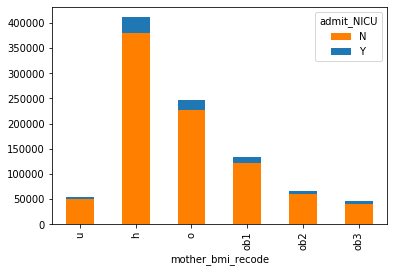

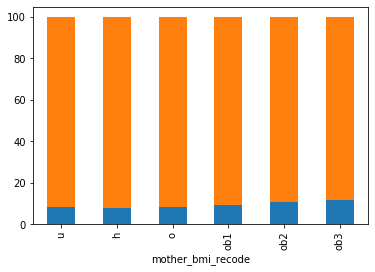

In [299]:
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mother_bmi_recode'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mother_bmi_recode')

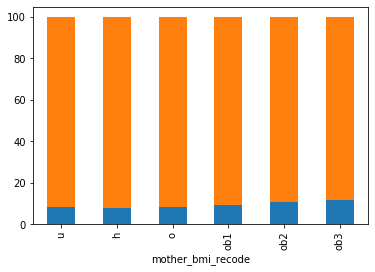

In [300]:
pct_bplot(births,'mother_bmi_recode')

## Mother's Age

In [ ]:
births['mothers_age_groups']= pd.cut(births['mothers_age'], 4, labels = ['12-19', '20-29', '30-39','40-50'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups')

In [ ]:
births['mothers_age'].max()

In [ ]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.png')

## Prior-termination births

In [ ]:
pter_plt = births_nou.groupby(['prior_terminations'])['admit_NICU'].value_counts().unstack()
pter_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_terminations')

# Prior living births

In [ ]:
plive_plt = births_nou.groupby(['prior_living_births'])['admit_NICU'].value_counts().unstack()
plive_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_living_births')

## Prior Dead births

In [ ]:
pdead_plt = births_nou.groupby(['prior_dead_births'])['admit_NICU'].value_counts().unstack()
pdead_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'prior_dead_births')

## time from last pregnancy


In [ ]:
#Since last other birth
val_check(births,'mo_since_last_live_birth')
plt.hist(births['mo_since_last_live_birth'])

In [ ]:
#Need to regroup somehows
mo_live_plt = births_nou.groupby(['mo_since_last_live_birth'])['admit_NICU'].value_counts().unstack()
mo_live_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births_nou,'mo_since_last_live_birth')

In [ ]:
#Since last other birth
val_check(births,'mo_since_last_other_birth')
plt.hist(births['mo_since_last_other_birth'])

# Diabetes

In [ ]:
gestdiab_plt = births_nou.groupby(['gest_diab'])['admit_NICU'].value_counts().unstack()
gestdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'gest_diab')

In [ ]:
prepregdiab_plt = births_nou.groupby(['pre_preg_diab'])['admit_NICU'].value_counts().unstack()
prepregdiab_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'pre_preg_diab')

## Prenatal visits

In [ ]:
val_check(births,'n_prenatal_visits')
plt.hist(births['n_prenatal_visits'])

In [ ]:
births['mothers_age_groups2']= pd.cut(births['mothers_age'], [0,14,19,24,29,34,39,44,49,100],
                                     labels = ['<15', '15-19', '20-24','25-29','30-34','35-39','40-44','45-49','50-100'])
bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mothers_age_groups2'])['admit_NICU'].value_counts().unstack()
bmi_plt.plot(kind = 'bar', logy = True, stacked = True, color = ['#ff7f00','#1f77b4'])
pct_bplot(births,'mothers_age_groups2')

## Mother's Health Risk Factors 

[Text(0, 0, 'Gestational Diabetes'),
 Text(0, 0, 'Pre-pregancy Diabetes'),
 Text(0, 0, 'Gestational Hypertension'),
 Text(0, 0, 'Pre-pregnancy Hypertension'),
 Text(0, 0, 'Hypertension Eclampsia'),
 Text(0, 0, 'Previous Pre-term Birth')]

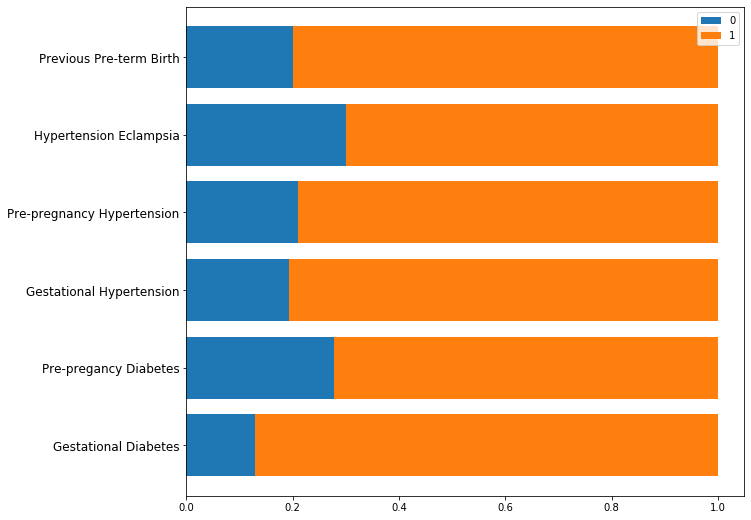

In [316]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten', 'hypten_ecl', 'prev_preterm_birth']
fullnames_list =['Gestational Diabetes', "Pre-pregancy Diabetes",'Gestational Hypertension', 'Pre-pregnancy Hypertension', 'Hypertension Eclampsia', 'Previous Pre-term Birth']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
# print(test)
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
test_plt.set_yticklabels(fullnames_list, fontsize = 12)

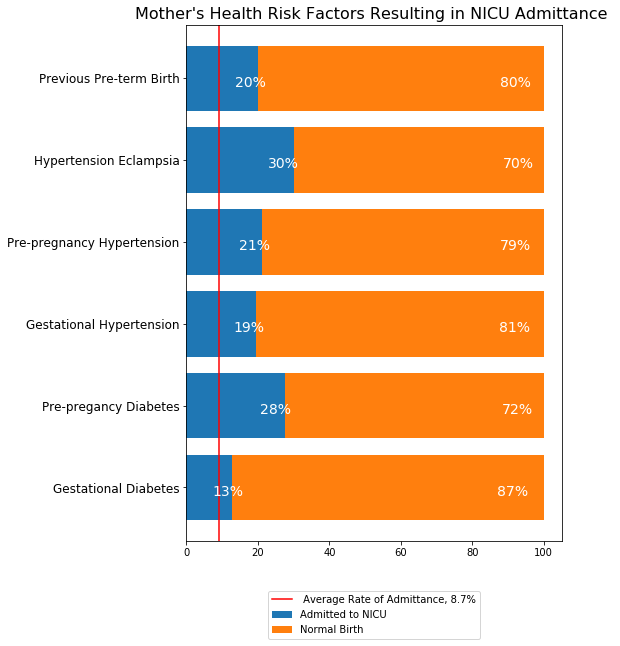

In [317]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_risks_barpct.png')

Vertical version template

In [ ]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'bar', width = 0.8, stacked = True, figsize = (10,7))
#Formatting 
plt.axhline(y=(9.14/100), color='r', linestyle='-', label = '9%')
test_plt.set_xticklabels(fullnames_list)
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'upper right')

#Adding annotation for percentages
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(height), (p.get_x()+.5*width, p.get_y() + height - 0.1), ha = 'center', color = 'w')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = .3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(pad = -12, rect = (0,0,.8,.9))



####  Mother's Health Risk Factors Counts  

In [318]:
cnames_list = ['gest_diab','pre_preg_diab', 'gest_hypten', 'pre_preg_hypten', 'hypten_ecl', 'prev_preterm_birth']
fullnames_list =['Gestational Diabetes', "Pre-pregancy Diabetes",'Gestational Hypertension', 'Pre-pregnancy Hypertension', 'Hypertension Eclampsia', 'Previous Pre-term Birth']
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

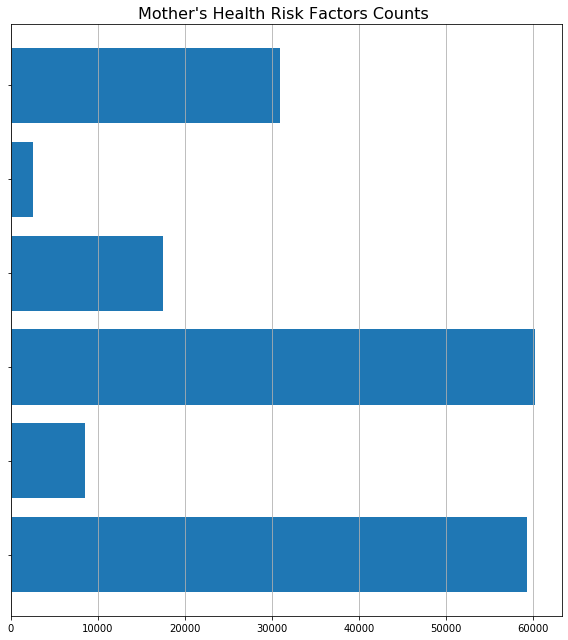

In [319]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_risks_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_risks_barcnt.png')

## Mother's Health Risks Infections

In [334]:
cnames_list = ['gonorrhea','syphilis', 'chlamydia', 'hepB', 'hepC']
fullnames_list =['Gonorrhea', "Syphilis",'Chlamydia', 'Hepatis B', 'Hepatitis C']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

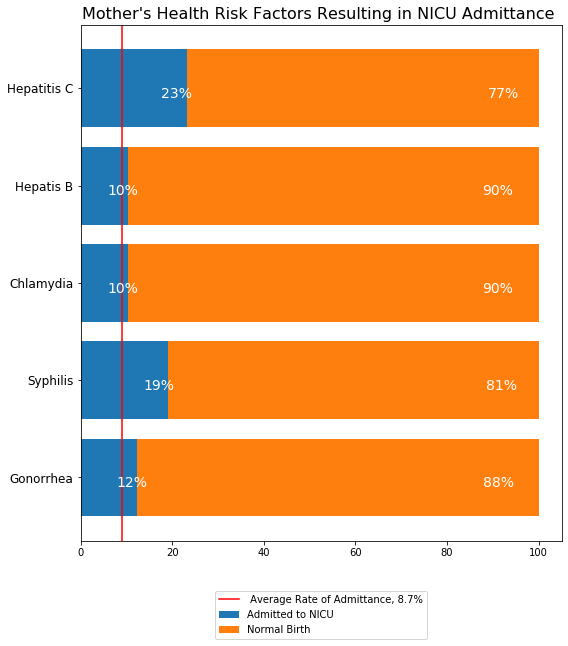

In [335]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_infections_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_infections_barpct.png')

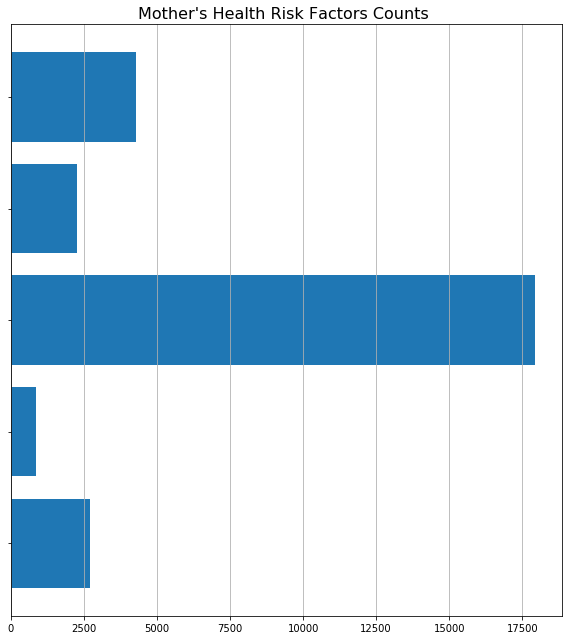

In [336]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_infections_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_infections_barcnt.png')

### Delivery type

In [337]:
cnames_list = ['infertility_treatment','fertil_enhance', 'asst_repro_tech']
fullnames_list =['Infertility Treatment', "Fertility Enhancement",'Assistant Reproductive Technology']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

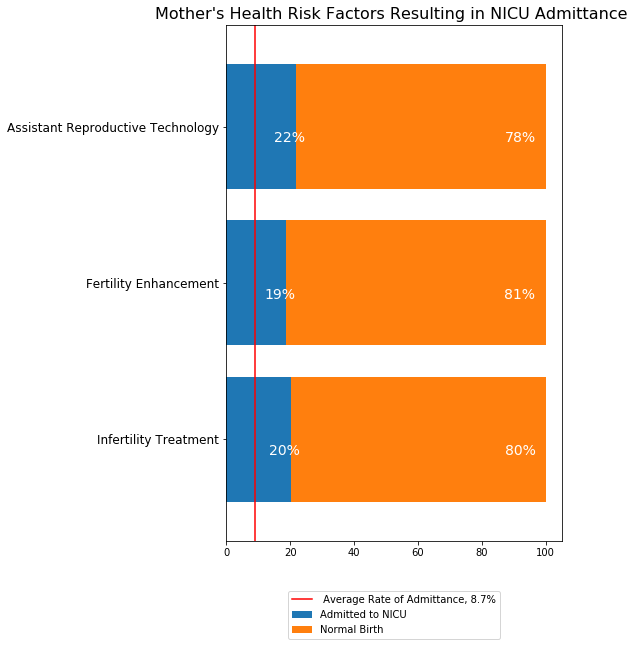

In [338]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Mother's Health Risk Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/mother_health_fertility_barpct.pdf')
plt.savefig('./Saved_Visualizations/mother_health_fertility_barpct.png')

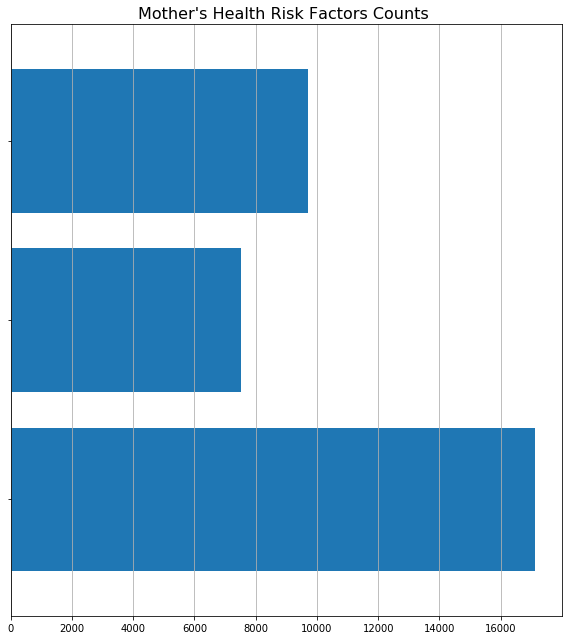

In [339]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels('', fontsize = 12)
test2_plt.set_title("Mother's Health Risk Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/mother_health_fertility_barcnt.pdf')
plt.savefig('./Saved_Visualizations/mother_health_rfertility_barcnt.png')

## Infant congenital factors

In [345]:
cnames_list = ['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
        'hypospadias']
fullnames_list =['seizures',
       'anencephaly', 'meningo_spina_bif', 'cyn_cong_heart_disease',
       'cong_diaph_hernia', 'omphalocele', 'gastroschisis',
       'limb_reduc_defect', 'cleft_lip_or_palate', 'cleft_palate_only',
         'hypospadias']
test = pd.concat(map( lambda cname: make_pctdf( births_nou, cname ), cnames_list ))
test2 = pd.concat(map( lambda cname: make_cntdf( births_nou, cname ), cnames_list ))

## Need to do a separate graph form down syndrome and suspected chromosomal disorder(Each
# has a third option for pending results)

In [346]:
colnames


array(['birth_year', 'birth_month', 'birth_time', 'birth_day_of_wk',
       'birth_place', 'mothers_age', 'mothers_nativity',
       'mothers_residence_status', 'mothers_race',
       'mothers_hispanic_origin', 'mothers_hispanic_origin2',
       'paternity_acknow', 'mothers_marital_status', 'mothers_education',
       'fathers_age', 'fathers_race', 'fathers_hispanic_origin',
       'fathers_hispanic_origin2', 'fathers_education',
       'prior_living_births', 'prior_dead_births', 'prior_terminations',
       'mo_since_last_live_birth', 'mo_since_last_other_birth',
       'mo_prenatal_care_began', 'n_prenatal_visits', 'wic', 'cigs_tri1',
       'cigs_tri2', 'cigs_tri3', 'mothers_height', 'mothers_bmi',
       'pre_preg_lbs', 'delivery_lbs', 'pre_preg_diab', 'gest_diab',
       'pre_preg_hypten', 'gest_hypten', 'hypten_ecl',
       'prev_preterm_birth', 'infertility_treatment', 'fertil_enhance',
       'asst_repro_tech', 'n_prev_cesar', 'no_risk_reported', 'gonorrhea',
       'syphilis',

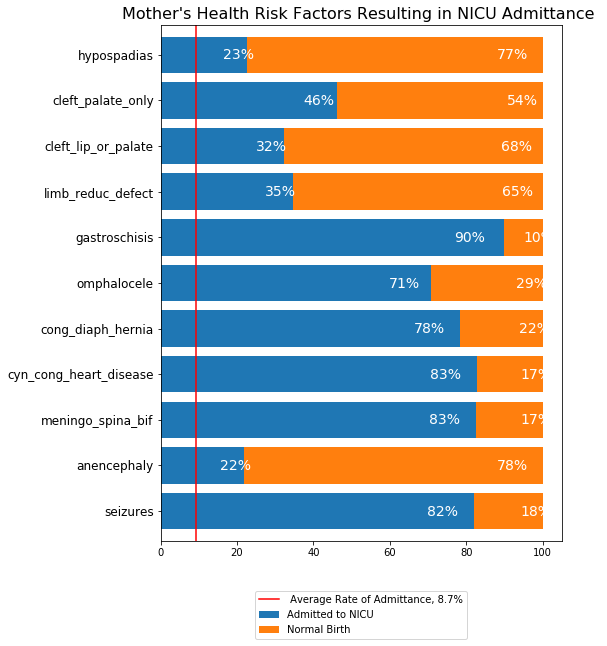

In [347]:
test_plt = (test.div(test.sum(1), axis=0)).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
# test_plt = (test.div(test.sum(1), axis=0)).sort_values(by = 1 ,ascending=False).plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))
#Need to figure out how to adjust axis labels to follow sorted data automatically

#Formatting  
plt.axvline(x=(9.14/100), color='r', linestyle='-', label = '8.7%')
test_plt.set_yticklabels(fullnames_list, fontsize = 12)
test_plt.set_xticklabels(('0','20','40','60','80', '100'))
test_plt.set_title("Infant's Congenital Factors Resulting in NICU Admittance ", fontsize = 16)
leg = test_plt.legend(labels=[' Average Rate of Admittance, 8.7%', 'Admitted to NICU', 'Normal Birth'],fontsize= 10, loc = 'lower center')
#Add annotation 
for p in test_plt.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    test_plt.annotate('{:.0%}'.format(width), (p.get_x()+.9*width, p.get_y() + height - .5),
                      ha = 'center', color = 'white', fontsize = 14)

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(test_plt.transAxes)

# Change to location of the legend. 
xOffset = -.2
bb.y0 += xOffset
bb.y1 += xOffset
leg.set_bbox_to_anchor(bb, transform = test_plt.transAxes)

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))

#Save Figure
plt.savefig('./Saved_Visualizations/infant_congenital_barpct.pdf')
plt.savefig('./Saved_Visualizations/infant_congenital_barpct.png')

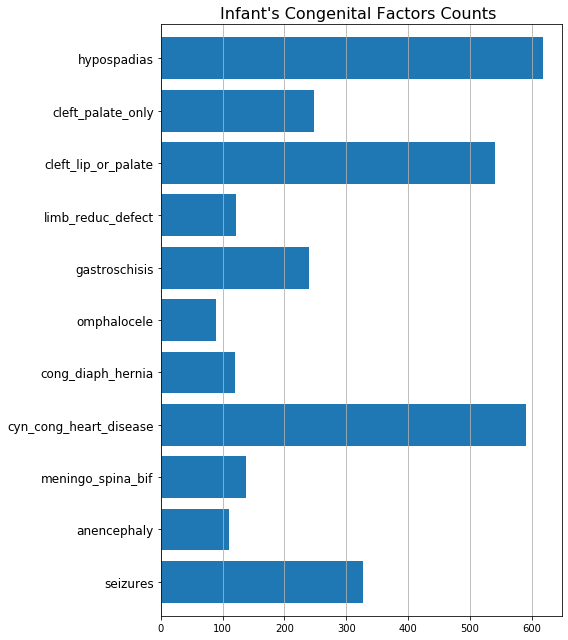

In [349]:
test2_plt = test2['admit_NICU'].plot(kind = 'barh', width = 0.8, stacked = True, figsize = (10,9))

#Setting tick labels empty becasue meant to align with Percentage plot
#must figure out how to make this a subplot of the above
test2_plt.set_yticklabels(fullnames_list, fontsize = 12)
test2_plt.set_title("Infant's Congenital Factors Counts ", fontsize = 16)
plt.grid(axis = 'x')

#Resize plot area to fit within Figure Size
plt.tight_layout(rect = (0,0,.8,1))


plt.savefig('./Saved_Visualizations/infant_congenital_barcnt.pdf')
plt.savefig('./Saved_Visualizations/infant_congenital_barcnt.png')